In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_excel("Credit Card Customer Data.xlsx")
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [211]:
df.shape

(660, 7)

In [212]:
df['Customer Key'].nunique()

655

In [213]:
## duplicate rows in dataframe
df[df.duplicated(['Customer Key'])]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


In [214]:
df=df.iloc[:,2:]
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.8 KB


In [216]:
df.isnull().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [217]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


{'whiskers': [<matplotlib.lines.Line2D at 0x117e3b98>,
 'caps': [<matplotlib.lines.Line2D at 0x117e3ef8>,
 'boxes': [<matplotlib.lines.Line2D at 0x117e39e8>],
 'medians': [<matplotlib.lines.Line2D at 0x117ed298>],
 'fliers': [<matplotlib.lines.Line2D at 0x117ed400>],
 'means': []}

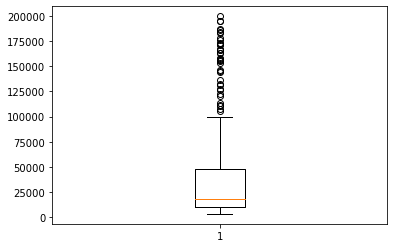

In [218]:
plt.boxplot(df['Avg_Credit_Limit'])

{'whiskers': [<matplotlib.lines.Line2D at 0x117f6be0>,
 'caps': [<matplotlib.lines.Line2D at 0x117f6880>,
 'boxes': [<matplotlib.lines.Line2D at 0x117f62f8>],
 'medians': [<matplotlib.lines.Line2D at 0x117be418>],
 'fliers': [<matplotlib.lines.Line2D at 0x117be070>],
 'means': []}

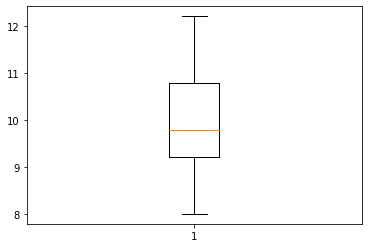

In [219]:
df['Avg_Credit_Limit']=np.log(df['Avg_Credit_Limit'])
plt.boxplot(df['Avg_Credit_Limit'])

In [220]:
df.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

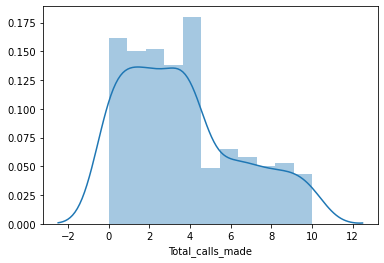

In [221]:
sns.distplot(df['Total_calls_made'])

{'whiskers': [<matplotlib.lines.Line2D at 0x14c03e20>,
 'caps': [<matplotlib.lines.Line2D at 0x14c032c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x14a6db98>],
 'medians': [<matplotlib.lines.Line2D at 0x14c03928>],
 'fliers': [<matplotlib.lines.Line2D at 0x14c03e68>],
 'means': []}

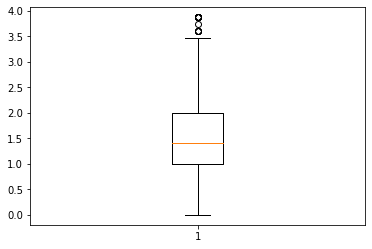

In [222]:
##df['Total_visits_online'].replace(0,0.000000001,inplace=True)
df['Total_visits_online']=np.sqrt(df['Total_visits_online'])
plt.boxplot(df['Total_visits_online'])


{'whiskers': [<matplotlib.lines.Line2D at 0x14a5c6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1113b910>,
 'boxes': [<matplotlib.lines.Line2D at 0x14a5c130>],
 'medians': [<matplotlib.lines.Line2D at 0x137ea928>],
 'fliers': [<matplotlib.lines.Line2D at 0x137ea280>],
 'means': []}

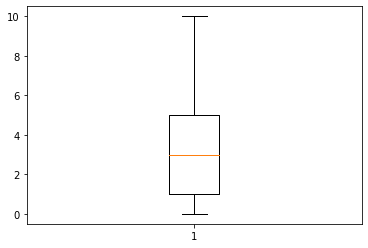

In [223]:
plt.boxplot(df['Total_calls_made'])

In [224]:
## scale/Normalise the data
from scipy.stats import zscore
df_z=df.apply(zscore)
df_z.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.630478,-1.249225,-0.860451,-0.361239,-1.251537
1,0.885387,-0.787585,-1.473731,2.003280,1.891859
2,0.885387,1.058973,-0.860451,0.439282,0.145528
3,0.336281,0.135694,-0.860451,-0.361239,0.145528
4,1.630478,0.597334,-1.473731,2.333334,-0.203739


Univariate Analysis

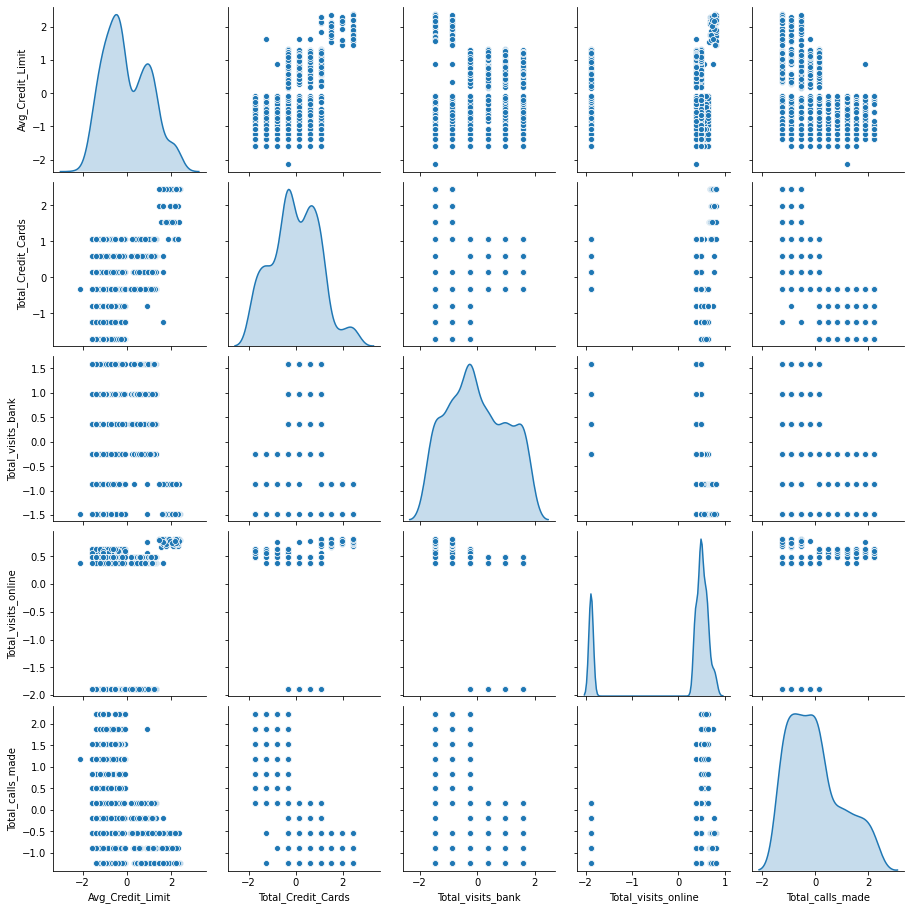

In [47]:
sns.pairplot(df_z,diag_kind='kde')

From the above pairplot, its intuitive to have atleast 4 or 5 clusters


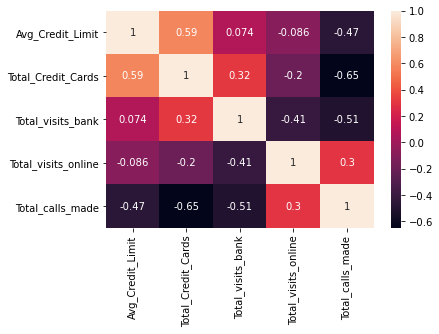

In [48]:
corr_df=df_z.corr()
sns.heatmap(corr_df,annot=True)

The positive relationship between Avg_credit_limit and Total_Credit_Cards is positive, which is obvious that, if the customer has more number of credit cards, then his credit limit is likely to be high.
All other features seems to be reasonably independant of each other

## Unsupervised Learning
## K Means Clustering 

In [225]:
from sklearn.cluster import KMeans
## Finding the optimal k
n_clusters=range(1,18)
cluster_error=[]
for cluster in n_clusters:
    k_means=KMeans(cluster,random_state=30)
    k_means.fit(df_z)
    error=k_means.inertia_
    cluster_error.append(error)
    

Text(0, 0.5, 'Average In-Cluster distortion')

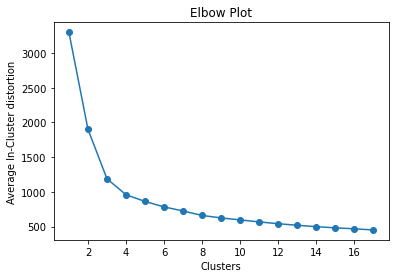

In [226]:
## Elbow plot
plt.plot(n_clusters,cluster_error,marker='o')
plt.title('Elbow Plot')
plt.xlabel("Clusters")
plt.ylabel("Average In-Cluster distortion")

In [227]:
## From the above plot, k=4 or k=5 is optimal
#Lets try with k=4
k_means=KMeans(n_clusters=4,random_state=50,n_init=5)
k_means.fit(df_z)
label=k_means.labels_
centers=k_means.cluster_centers_


In [228]:
## Cluster Centroids
kmeans_center=pd.DataFrame(centers,columns=list(df_z))
kmeans_center.T

,0,1,2,3
Avg_Credit_Limit,0.838906,-0.728771,1.966490,-0.711378
Total_Credit_Cards,0.388647,-1.059623,1.862226,0.354074
Total_visits_bank,0.612542,-0.901518,-1.105763,0.737016
Total_visits_online,-0.616048,0.574881,2.123673,-0.599057
Total_calls_made,-0.533867,1.148109,-0.874330,-0.578102


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x137AAA90>,
      dtype=object)

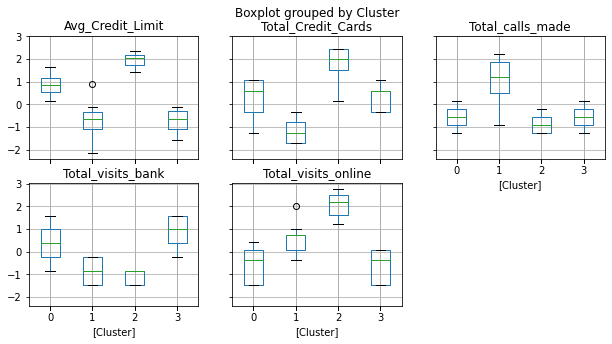

In [229]:
## Analysing the clusters with boxplot
df_kmeans=df_z.copy()
df_kmeans['Cluster']=label
df_kmeans.boxplot(by='Cluster',layout=(2,3),figsize=(10,5))

In [230]:
df_kmeans.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,1.630478,-1.249225,-0.860451,-0.361239,-1.251537,0
1,0.885387,-0.787585,-1.473731,2.003280,1.891859,1
2,0.885387,1.058973,-0.860451,0.439282,0.145528,0
3,0.336281,0.135694,-0.860451,-0.361239,0.145528,0
4,1.630478,0.597334,-1.473731,2.333334,-0.203739,2


In [231]:
## cluster analysis
# Group 2 is characterised by high Credit limits and high number of total credit cards
# Group 

In [232]:
## Silhoutte score for KMeans model
from sklearn.metrics import silhouette_score
s_kmeans=silhouette_score(df_z,label)
print(s_kmeans)

0.3748105957744142


In [233]:
df_k=df.copy()
df_k['Cluster']=label

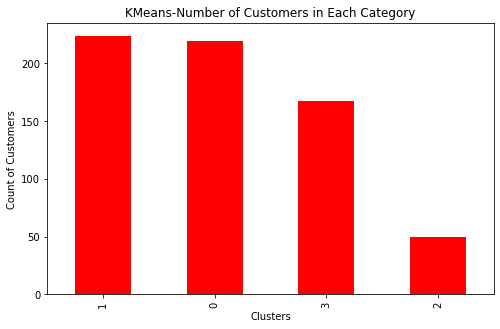

In [234]:
plt.figure(figsize=(8,5))
df_kmeans['Cluster'].value_counts().plot.bar(color='red')
plt.xlabel("Clusters")
plt.ylabel("Count of Customers")
plt.title("KMeans-Number of Customers in Each Category")
plt.show()

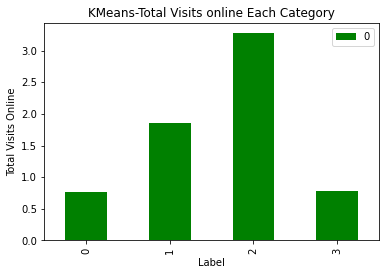

In [235]:
zero = df_k[df_k['Cluster'] == 0].Total_visits_online.mean()
one = df_k[df_k['Cluster'] == 1].Total_visits_online.mean()
two = df_k[df_k['Cluster'] == 2].Total_visits_online.mean()
three = df_k[df_k['Cluster'] == 3].Total_visits_online.mean()


indices = ['0','1','2', '3']
bar = pd.DataFrame([zero, one, two, three], index = indices)
bar.plot.bar(color='green')
plt.xlabel('Label')
plt.ylabel('Total Visits Online')
plt.title("KMeans-Total Visits online Each Category")
plt.show()

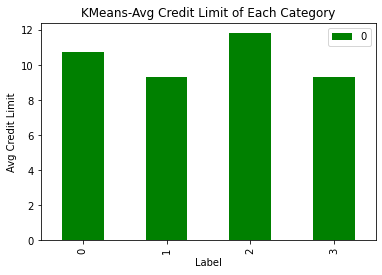

In [236]:
zero = df_k[df_k['Cluster'] == 0].Avg_Credit_Limit.mean()
one = df_k[df_k['Cluster'] == 1].Avg_Credit_Limit.mean()
two = df_k[df_k['Cluster'] == 2].Avg_Credit_Limit.mean()
three = df_k[df_k['Cluster'] == 3].Avg_Credit_Limit.mean()


indices = ['0','1','2', '3']
bar = pd.DataFrame([zero, one, two, three], index = indices)
bar.plot.bar(color='green')
plt.xlabel('Label')
plt.ylabel('Avg Credit Limit')
plt.title("KMeans-Avg Credit Limit of Each Category")
plt.show()

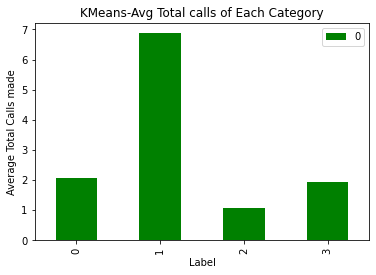

In [237]:
zero = df_k[df_k['Cluster'] == 0].Total_calls_made.mean()
one = df_k[df_k['Cluster'] == 1].Total_calls_made.mean()
two = df_k[df_k['Cluster'] == 2].Total_calls_made.mean()
three = df_k[df_k['Cluster'] == 3].Total_calls_made.mean()


indices = ['0','1','2', '3']
bar = pd.DataFrame([zero, one, two, three], index = indices)
bar.plot.bar(color='green')
plt.xlabel('Label')
plt.ylabel('Average Total Calls made')
plt.title("KMeans-Avg Total calls of Each Category")
plt.show()

HIERARCHICAL CLUSTERING

In [238]:
# Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
model_hier=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')
model_hier.fit(df_z)
label=model_hier.labels_
df_hier=df_z.copy()
df_hier['Cluster']=label
df_hier.head()


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,1.630478,-1.249225,-0.860451,-0.361239,-1.251537,1
1,0.885387,-0.787585,-1.473731,2.003280,1.891859,0
2,0.885387,1.058973,-0.860451,0.439282,0.145528,2
3,0.336281,0.135694,-0.860451,-0.361239,0.145528,2
4,1.630478,0.597334,-1.473731,2.333334,-0.203739,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118BB088>,
      dtype=object)

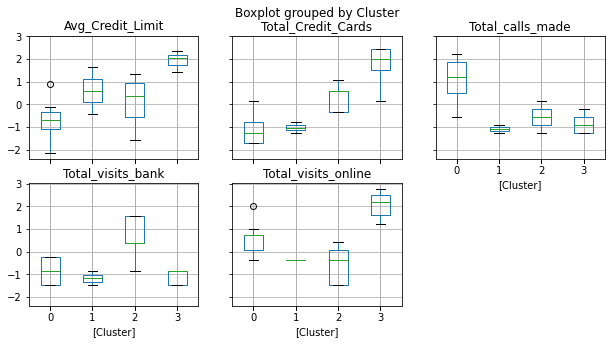

In [239]:
## Analysing the clusters with boxplot

df_hier.boxplot(by='Cluster',layout=(2,3),figsize=(10,5))

In [240]:
## Silhouette score for hierarchical clustering
from sklearn.metrics import silhouette_score
s_hier=silhouette_score(df_z,label,metric='euclidean',random_state=50)
print(s_hier)

0.38871324593967815


In [241]:
## cophenetic coeff
from scipy.cluster.hierarchy import cophenet,linkage,dendrogram
from scipy.spatial.distance import pdist
Z=linkage(df_z,metric='euclidean',method='average')
c,c_dis=cophenet(Z,pdist(df_z))
c

0.8493137378042586

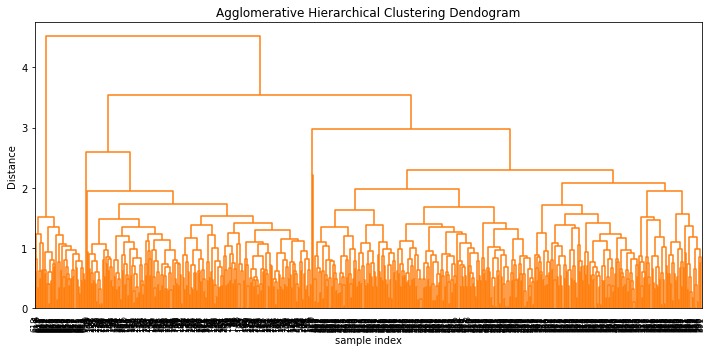

In [248]:
## Dendrogram
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

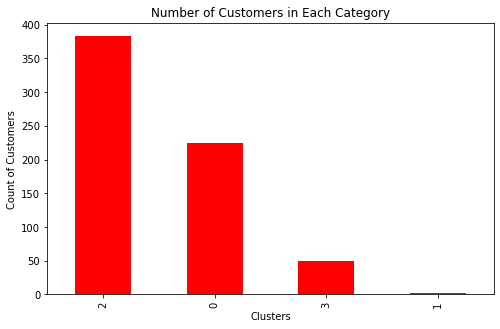

In [242]:
plt.figure(figsize=(8,5))
df_hier['Cluster'].value_counts().plot.bar(color='red')
plt.xlabel("Clusters")
plt.ylabel("Count of Customers")
plt.title("Number of Customers in Each Category")
plt.show()


In [243]:
## Cluster 0 has the highest number of customers and cluster 3 has the lowest number of customers


In [244]:
## Assigning the labels to the original dataset
df['Cluster']=label

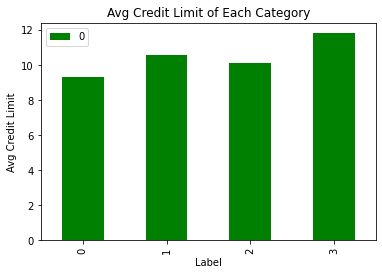

In [245]:
zero = df[df['Cluster'] == 0].Avg_Credit_Limit.mean()
one = df[df['Cluster'] == 1].Avg_Credit_Limit.mean()
two = df[df['Cluster'] == 2].Avg_Credit_Limit.mean()
three = df[df['Cluster'] == 3].Avg_Credit_Limit.mean()


indices = ['0','1','2', '3']
bar = pd.DataFrame([zero, one, two, three], index = indices)
bar.plot.bar(color='green')
plt.xlabel('Label')
plt.ylabel('Avg Credit Limit')
plt.title("Avg Credit Limit of Each Category")
plt.show()

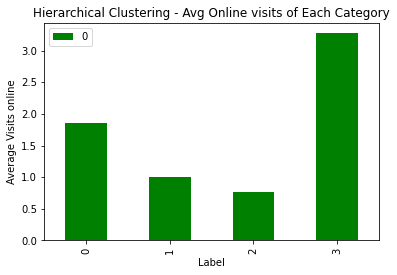

In [246]:
zero = df[df['Cluster'] == 0].Total_visits_online.mean()
one = df[df['Cluster'] == 1].Total_visits_online.mean()
two = df[df['Cluster'] == 2].Total_visits_online.mean()
three = df[df['Cluster'] == 3].Total_visits_online.mean()


indices = ['0','1','2', '3']
bar = pd.DataFrame([zero, one, two, three], index = indices)
bar.plot.bar(color='green')
plt.xlabel('Label')
plt.ylabel('Average Visits online')
plt.title("Hierarchical Clustering - Avg Online visits of Each Category")
plt.show()

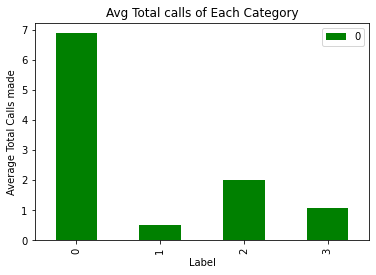

In [247]:
zero = df[df['Cluster'] == 0].Total_calls_made.mean()
one = df[df['Cluster'] == 1].Total_calls_made.mean()
two = df[df['Cluster'] == 2].Total_calls_made.mean()
three = df[df['Cluster'] == 3].Total_calls_made.mean()


indices = ['0','1','2', '3']
bar = pd.DataFrame([zero, one, two, three], index = indices)
bar.plot.bar(color='green')
plt.xlabel('Label')
plt.ylabel('Average Total Calls made')
plt.title("Avg Total calls of Each Category")
plt.show()

### Comparison of KMeans Clusters and Hierarchical Clusters

### Hierarchical Clustering Analysis

Label 3 category has the highest Avg Credit limit and online visits, while the number of customers and total calls made, and  bank visits is the lowest

Label 0 category has the highest Total Calls made, while the average credit limit in label 0 is the lowest and is characterized by second highest number of customers.

Label 1 has the lowest total calls made

Label 2 is characterized by lowest average online visits

### KMeans Clustering Analysis

Label 2 has highest Avg Credit Limit and highest online visits, while the number of customers and total calls made is lowest.

Label 1 has highest total calls made, while lowest Avg Credit Limit and is characterised by highest number of customers.

Label 0 has lowest average total Online visits and high Average Credit Limits

Label 3 has lowest Online visits and highest bank visits



### Key Questions:

#### How many different segments of customers are there?
4 different segments of customers

#### How are these segments different from each other?
The 4 segments are distinct and their profile is below:

Label 0: Lowest Avg Credit limit Customers and make high number of Calls

Label 1: High Credit limit but less total number of Credit Cards and least total number of calls

Label 2: Customers making least Average online visits

Label 3: Highest Avg Credit limit customers and highest total number of credit cards

#### What are your recommendations to the bank on how to better market to and service these customers?
I would recommend the Market research team to focus their personalised Campaigns on Label 1 customers who have high Avg Credit limit but less number of Credit Cards. These potential customers can be targeted to take more credit cards.I would also recommend them to focus on label 0 customers, to improve their credit limit and hence sell more credit cards to them. 

Recommend the Operations and Service team to focus on Label 0 customers, since they make the most number of calls. 


